<a href="https://colab.research.google.com/github/SAIPRIYADODDA/NNDL/blob/main/ASSIGNMENT4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sb
from scipy import stats

In [5]:
df=pd.read_excel('/content/drive/MyDrive/unioncarbide.xls')
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [6]:
df.tail()

,X,Y
29,8.5,48
30,7.8,147
31,6.7,117
32,7.1,182
33,7.3,87


In [7]:
k= np.abs(stats.zscore(df))
print(k)

[[0.12500664 0.25847285]
 [1.13696519 0.56778404]
 [1.08934361 0.58597881]
 [0.32739835 0.8225109 ]
 [0.52979006 0.51319971]
 [0.27977677 0.00374598]
 [0.73218177 1.3501594 ]
 [0.68456019 0.85890045]
 [1.13696519 0.01444879]
 [0.32739835 0.85890045]
 [0.8869519  1.31376985]
 [1.3393569  1.02265344]
 [0.73218177 2.16892432]
 [0.27977677 0.6876555 ]
 [0.73218177 0.39653909]
 [0.68456019 1.12433013]
 [1.69651874 1.10613535]
 [1.13696519 1.22279597]
 [1.08934361 1.07723776]
 [0.48216848 0.22208329]
 [0.12500664 0.25847285]
 [2.30369386 0.07652509]
 [0.93457348 0.17820178]
 [0.48216848 1.63378385]
 [0.8869519  1.57919952]
 [0.07738507 0.5420973 ]
 [1.49412703 1.96128982]
 [0.52979006 0.32375998]
 [0.73218177 1.21530401]
 [1.69651874 1.72475773]
 [0.27977677 0.07652509]
 [1.94653203 0.46931819]
 [1.13696519 0.71334225]
 [0.73218177 1.01516147]]


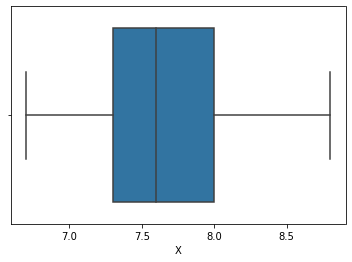

In [8]:
sb.boxplot(x=df['X'])

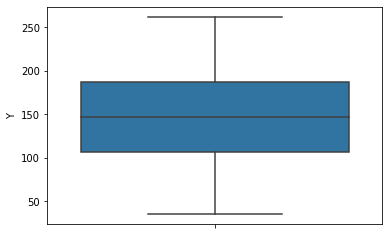

In [9]:
sb.boxplot(y=df['Y'])

In [10]:
p_df = df[(k < 3).all(axis=1)]
p_df.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [11]:
for i in df:
    q = df[i].quantile(0.99)
    df[df[i] < q]
    q_low = df[i].quantile(0.01)
    q_hi  = df[i].quantile(0.99)

    df_filtered = df[(df[i] < q_hi) & (df[i] > q_low)]
df_filtered.head()

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171


In [12]:
data = df_filtered
print(len(data))
print(len(df_filtered))
if(len(data) == len(df_filtered)):
    print('No outliners')

32
32
No outliners


In [13]:
new_data=df.copy()
new_data = (new_data - new_data.min())/(new_data.max() - new_data.min())
new_data.head()

,X,Y
0,0.428571,0.537445
1,0.190476,0.612335
2,0.714286,0.616740
3,0.380952,0.674009
4,0.333333,0.599119


In [14]:
train_data,test_data = train_test_split(new_data,train_size=0.9)
print(len(train_data))
train_data.head()

30


,X,Y
18,0.714286,0.735683
17,0.190476,0.770925
10,0.666667,0.792952
30,0.523810,0.493392
7,0.619048,0.682819


In [15]:
x_val=np.array(train_data['X'])
y_val=np.array(train_data['Y'])

In [17]:
from sympy import Symbol, Derivative, symbols
m= Symbol('m')
c= Symbol('c')
function = '0.5*(y-m*x-c)**2'
partialderiv= Derivative(function, m)
dfm = partialderiv.doit()
partialderiv= Derivative(function, c)
dfc = partialderiv.doit()

print(f'first order derivatives of given function are de/dm = {dfm} ,de/dc = {dfc}')
err = []
#step 1 initialise values 
m1 = -1.0 
c1 = 1.0  #variable x, y
epoches = 100  
learning_rate = 0.1  #learning rate
for i in range(0,epoches):
    er =0
    for j in range(0,len(x_val)):
        er +=  ((y_val[j] - (m1 * x_val[j]) - c1))**2
        #step 2 substitute x ,y in first order derivatives df/dx, df/dy
        m = symbols('m')
        c = symbols('c')
        x = symbols('x')
        y = symbols('y')
        dfmv = dfm.subs(m, m1) 
        dfmv = dfmv.subs(c, c1) 
        dfmv = dfmv.subs(x, x_val[j]) 
        dfmv = dfmv.subs(y, y_val[j]) 
        dfmv = round(dfmv,2)
        dfcv = dfc.subs(c, c1) 
        dfcv = dfcv.subs(m, m1) 
        dfcv = dfcv.subs(x, x_val[j]) 
        dfcv = dfcv.subs(y, y_val[j]) 
        dfcv = round(dfcv,2)
        #step3 find change in x , y
        dm = (-1.0)*learning_rate*dfmv
        dc = (-1.0)*learning_rate*dfcv
        #step4 update variable 
        m1 = m1 + dm
        m1 = round(m1, 2) 
        c1 = c1 + dc
        c1 = round(c1, 2)

        er = (1/(2*len(train_data['X'])))*(er)
        err.append(er)
    #step5 increment iterations 
    #step6 break loop if iterations exceed no of epoches
#step7 print variable x1, y1
print(m1, c1)
print(f'minimum value obtained at m = {m1} ,c ={c1} for given function')


first order derivatives of given function are de/dm = -1.0*x*(-c - m*x + y) ,de/dc = 1.0*c + 1.0*m*x - 1.0*y
-0.40 0.59
minimum value obtained at m = -0.40 ,c =0.59 for given function


In [37]:
from sklearn.metrics import mean_squared_error

train_data_pred =  m1*train_data['X'] + c1

train_mse = mean_squared_error(train_data['Y'],train_data_pred)
train_mse

0.060549009130913274

Text(0.5, 1.0, 'predicted data vs actual data')

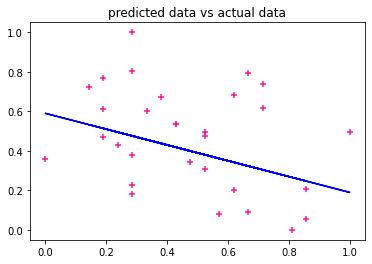

In [30]:
plt.plot(np.array(train_data['X']),np.array(train_data_pred),color='blue')
plt.scatter(np.array(train_data['X']),np.array(train_data['Y']),marker='+',color='deeppink')
plt.title('predicted data vs actual data')

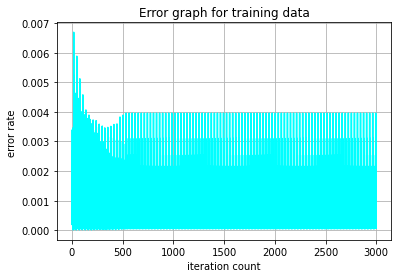

In [34]:
iters = np.arange(epoches*len(x_val))
plt.plot(iters,err,'cyan')
plt.title("Error graph for training data")
plt.xlabel("iteration count")
plt.ylabel("error rate ")
plt.grid()

In [36]:
test_data_pred = m1 *test_data['X'] + c1
test_mse = mean_squared_error(test_data['Y'],test_data_pred)
test_mse

0.027427913004210686

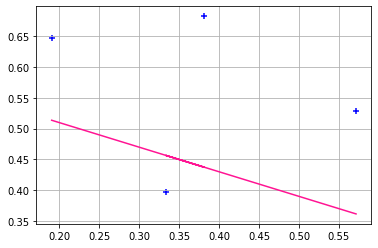

In [39]:
plt.scatter(test_data['X'],test_data['Y'],marker='+',color='blue')
plt.plot(test_data['X'],test_data_pred,color='deeppink')
plt.grid()

In [41]:
x_min = df['X'].min()
x_max = df['X'].max()
y_min = df['Y'].min()
y_max = df['Y'].max()

In [45]:
x =x1 = float(input("enter pH value of well water :"))
x = (x - x_min)/(x_max - x_min)
y = m1*x + c1
y = y*(y_max - y_min) + y_min
print(f"bicarbonates of well water based on its pH {x1} is : {y}")

enter pH value of well water :10
bicarbonates of well water based on its pH 10.0 is : 26.2436523437500
